<p align ="center"><img src="images/house.jpg" alt="Boston House" height="500" title="Boston House Prices"/></p>

<h1 align ="center">Boston Housing Prices</h1>
<h1 align ="center">Machine Learning and Statistics Project 2019</h1>
<h2 align ="center">Roisin Fallon</h2>


## Table of Contents

1. [Python Libraries](#lib)
2. [Boston Housing Dataset](#boston)
    * [Keys](#keys)
    * [Feature Names](#feature)
    * [DESC](#desc)
5. [Conclusion](#con)
6. [Bibliography](#bib)

<a name="lib"></a>
## Python Libraries:

<b> Anaconda on your device (version 3.7 +) </b>

 <a href=https://www.anaconda.com/distribution/> Download here </a>

This contains porting for the library listed below. By downloading Anaconda it removes the need to import numerous libraries seperately.
 
 <b> Pandas </b> 
 
 <a href=https://pandas.pydata.org/getpandas.html> Download here </a>
 
This is a Python package designed to strucure information in rows and columns.  It is known for quick and easy data manipulation, aggregation, and visualization.  Python takes in data via a CSV, TSV file or SQL database and creates a Python object called a data frame. Brief Introducton of Panda outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673> here. </a>

<b> NumPy </b> 

<a href=http://www.numpy.org/> Download here </a>

This is a numerical library, performs many mathematical operations and handles i.  Brief introductiion outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db> here. </a>

<b> Matplotlib </b> 

<a href=https://matplotlib.org/downloads.htmll> Download here </a>

This is a plotting library, makes  2D plots  that helps in the visualisation of figures using one or multiple numeric variables. It can generate histograms, pie charts, time series, boxplot, violin plot, stack plot, stem plots and scatter plots.  It can be used in Python scripts, Jupyter notebook, and web application servers.  Brief Introduction outlined  <a href=https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70> here. </a>

<b> Seaborn </b>

This a satistical plotting library  which has more advanced data visualisation than matplotlib (both are plotting libraries). Seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib. It gives a high-level interface to draw statistical graphs, making it easier to generate more complex visualizations. Brief introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850> here. </a>

<b> Scikit-learn </b>

Simple and efficient tool that can be used for data miming or data analysis. It's library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. It comes as part of the anaconda package Brief introduction outlined <a href=https://scikit-learn.org/stable/install.html > here. </a>

In [1]:
# Import the library for generating random variables
import numpy as np

# Import the library for handling data
import pandas as pd

# Visualisation library
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import libraries for plotting
import matplotlib.pyplot as plt

# Import the libraries for T-test and ANOVA
import scipy.stats as stats

# inport statsmodels.
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# To plot the graph embedded in the notebook
%matplotlib inline

In [2]:
# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (20, 10)

<a name="boston"></a>
## Boston Housing Dataset 

In [3]:
# Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Commented out the print statement here as it is difficult to read and interupt.
# print(boston)  

# Adapted from: https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb

#Values
price = boston.target                                   # Target values
feature = boston.data                                   # Attributes values

# Store in DataFrame
attributes = boston.feature_names                       # Feature names
data = pd.DataFrame(feature, columns = attributes)
target = pd.DataFrame(price, columns =['MEDV'])
df = pd.concat([data, target,], axis = 1)               # concat data/target

<a name="keys"></a>

### Keys 

The Boston dataset is a dictinary which holds keys and values for keys. This gives a quick insight into what the boston housing price dataset contains. Fro this we can see that this dataset not only contains data but contains information about this data. 
https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

In [4]:
# What fields are in this dictionary

print("Keys in the boston dataset: \n", boston.keys())

Keys in the boston dataset: 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<a name="feature"></a>
### Feature Names

From the shape command we can see that the boston dataset consists fo 506 rows and 13 columns. This command will tell us what each of the 13 columns represent in the dataset. It also indicates that we are missing the MEDV variable which represents the median value of owner-occupied homes in $1000s.

In [5]:
# Determine what each of the columns in the dataset represent

print("\nColumn names of the Boston Dataset represent the following:\n\n", boston.feature_names)   


Column names of the Boston Dataset represent the following:

 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<a name="desc"></a>
### DESCR

This will provide the dataset characteristics for the dataset.

In [6]:
# Describes the dataset

print(boston.DESCR)

print("\n\n**********************************************************************")
print("                            DESC Summary                              ")
print("**********************************************************************")

print("Number of Houses                   : ", data.shape[0])
print("Number of Housing Features         : ", data.shape[1])
print("**********************************************************************\n")

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<a name="head"></a>
### Head  of the dataset

In [7]:
# Default is the first 5 rows 

print("\n\n**************************************************************************************")
print("                               Head of the Boston Dataset                       ")
print("**************************************************************************************")
df.head()



**************************************************************************************
                               Head of the Boston Dataset                       
**************************************************************************************


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<a name="tail"></a>
### Tail of the dataset

In [8]:
# Print the last 5 rows

print("\n\n**************************************************************************************")
print("                               Tail of the Boston Dataset                       ")
print("**************************************************************************************")
df.tail()



**************************************************************************************
                               Tail of the Boston Dataset                       
**************************************************************************************


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<a name="stats"></a>
##  EDA and Statistical Summary

In [9]:
# The following code performs several statistical calculations on the dataset.

# TMinimum price of the data
minimum_price = np.min(price)
# Alternative using pandas
# minimum_price = prices.min()

# Maximum price of the data 
maximum_price = np.max(price)
# Alternative using pandas
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(price)
# Alternative using pandas
# mean_price = prices.mean()

# Median price of the data - 50% i.e. the halfway marker of the dataset
median_price = np.median(price)
# Alternative using pandas
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(price)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(price, 25)
third_quartile = np.percentile(price, 75)     #  75% of the data has values less than this number        
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'

print("\n\n******************************************")
print("Statistics for the Boston Housing dataset")
print("******************************************\n")
print("Minimum Housing Price          : ${:,.0f}".format(minimum_price*1000))
print("Maximum Housing Price          : ${:,.0f}".format(maximum_price*1000))
print("Mean Housing Price             : ${:,.0f}".format(mean_price*1000))
print("Median Housing Price           : ${:,.0f}".format(median_price*1000))
print("Standard deviation of prices   : ${:,.0f}".format(std_price*1000))
print("First quartile of prices       : ${:,.0f}".format(first_quartile*1000))
print("Second quartile of prices      : ${:,.0f}".format(third_quartile*1000))
print("Interquartile (IQR) of prices  : ${:,.0f}".format(inter_quartile*1000))



******************************************
Statistics for the Boston Housing dataset
******************************************

Minimum Housing Price          : $5,000
Maximum Housing Price          : $50,000
Mean Housing Price             : $22,533
Median Housing Price           : $21,200
Standard deviation of prices   : $9,188
First quartile of prices       : $17,025
Second quartile of prices      : $25,000
Interquartile (IQR) of prices  : $7,975


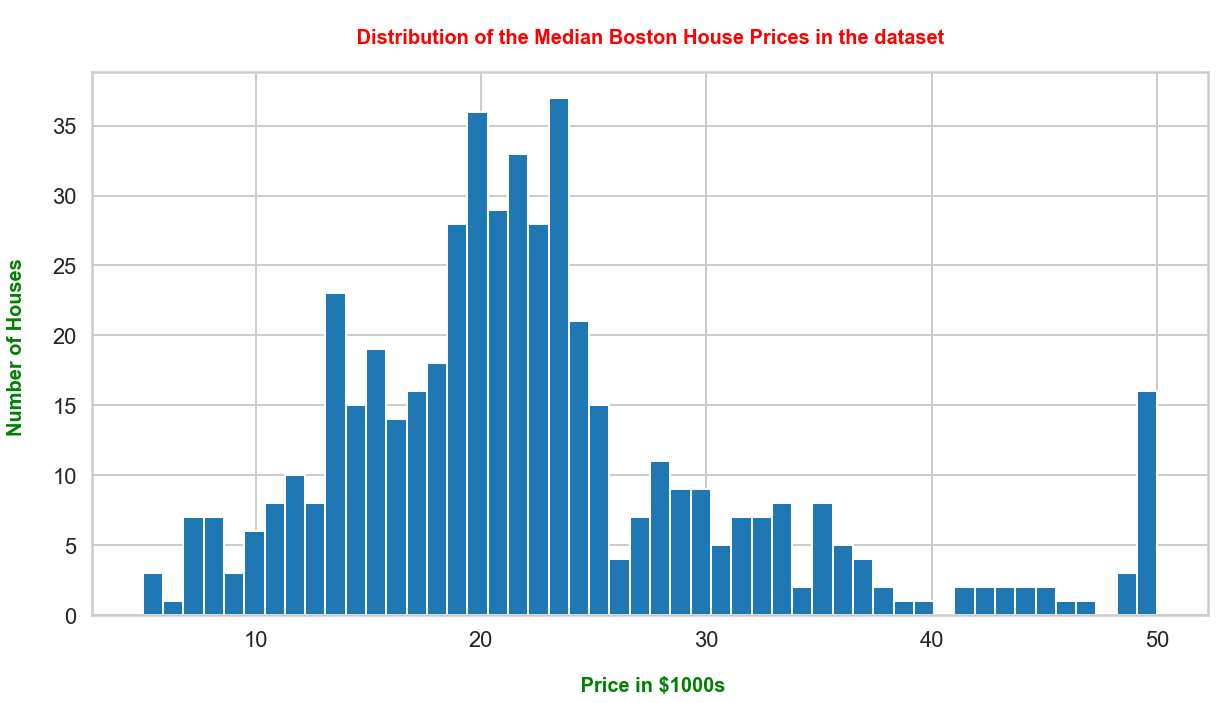

In [10]:
# Quick Visualisation of the house price in the dataset
plt.hist(boston.target,bins=50) 
plt.xlabel("\n Price in $1000s", fontweight="bold", fontsize="20", color="g")                       
plt.ylabel("Number of Houses \n", fontweight="bold", fontsize="20", color="g")                                              
plt.title("\n Distribution of the Median Boston House Prices in the dataset \n", fontweight="bold", fontsize="20", color="r")  
plt.show()

<i> From the above plot we can see that the median house prices are distributed normally with few outliers particularly to the right of the plot. The majority of the house prices are in the region of \\$17,000 to \\$25,000. We can see from the plot that there is appears to be a number of points at the \\$50,000. This could indicate that there is a cap on the MEDV house price of \\$50,000, this is important to note and will be used later in the project. </i>

In [11]:
# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'

print("\n***********************************************************")
print("      Statistics Summary for the Boston Housing dataset")
print("***********************************************************")
df.describe(include='all').T.round(2)


***********************************************************
      Statistics Summary for the Boston Housing dataset
***********************************************************


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


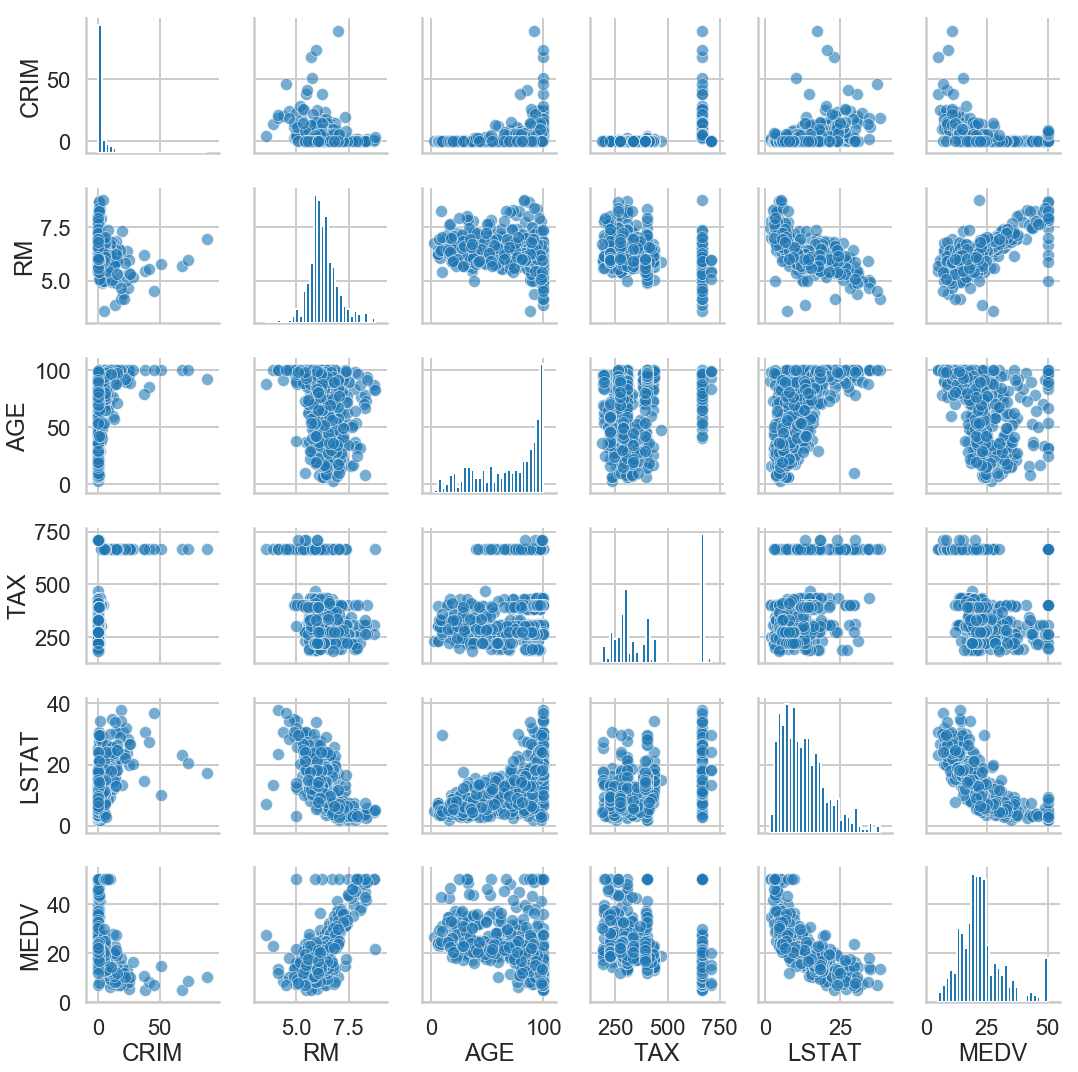

In [12]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
# Adapted from: https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
cols = ['CRIM', 'RM', 'AGE', 'TAX', 'LSTAT', 'MEDV'] 
sns.pairplot(df[cols], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30}) 

<i>Pairplot is a really simple way to visualize relationships between 2 variables. It produces a matrix of relationships between the selected variaables in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use. <a href=https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d>[1]</a>

From the histograms we can note the following:

* RM and MEDV has the closest resembelence to normal distribution. 
* Age is strongly skewed to the left. Skewed is defined in terms of where the mean is positioned in relation to the max. <a href=https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset>[2]</a>
* LSAT is skewed to the right 
* TAX we can see there is a spike at 700 i.e. a large amount of points are distributed around 700. This is similar to the MEDV histplot from earlier where there are a number of outliers at the \\$50,000 mark.
* CHAS variable is a categorical variable with 2 outcomes YES or NO also known as a binary variable. This will be discussed in detail in Section 2. 

From the scatterplots we can note the following:

* Negative correlation between CRIM and MEDV which infers that higher crime rates are associated with neighbourhoods with lower house values. 
* There is a stronger negative correlation seen between MEDV and LSAT. 
* There is a strong positive correlation between RM and MEDV which infers the higher the median house vaues is associated with higher room number per dwelling.</i>

<a name="info"></a>
### Info 

Provides information on the Boston dataset including names of columns, total number of rows and columns, data type of each column, range index and memory usage.

In [13]:
print("\n*****************************************")
print("Information on the Boston Housing Dataset")
print("*****************************************\n")
df.info()


*****************************************
Information on the Boston Housing Dataset
*****************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


<a name="clean"></a>
## Cleaning of the data

It is important to understand that NaN or missing values can take a number of different forms e.g. 0 or  written as "missing". It can be noted when we ran the head and tail of the dataset there are a number of 0's for ZN and CHAS. Thus, we can replace the 0's with NaN to calculate how much data we are missing. <a href=https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c>[3]</a>

In [14]:
# Copy the dataset for the Descriptive and Interference section
df1 = df.copy(deep=True)

In [15]:
# Adapted from: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c

df1.ZN.replace(0, np.nan, inplace = True)
df1.CHAS.replace(0, np.nan, inplace = True)

In [16]:
# Rerun the .info() method to determine the details of the missing values in the dataset following the replacement of the 0 values with NaN
print("\n*************************************")
print("  Info on Boston Housing Dataset\n   After Cleaning of the Data")
print("*************************************\n")    
df1.info()


*************************************
  Info on Boston Housing Dataset
   After Cleaning of the Data
*************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         134 non-null float64
INDUS      506 non-null float64
CHAS       35 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### Calculate the percent of missing values

When we run the code below we can see there is over 70% of the data missing from "ZN" and "CHAS" so we should remove these features as they will impact the result. <a href=https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c>[4]</a>

In [17]:
df1.isnull().sum() / len(data) * 100

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64

#### Dropping the columns 

In [18]:
df1 = df1.drop(['ZN', 'CHAS'], axis = 1)

In [19]:
# Here we rerun the info code to see that there is no missing values 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CRIM       506 non-null float64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12)
memory usage: 47.5 KB


## Correlation

* Correlation matrix measures the relationship between the variables
* Correlation coefficient ranges from -1 to 1
* Values close to 1 infers there is a strong positive correlation between the 2 variables
* Values close to  -1 indicates there is a strong negative correlation <a href=https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155>[5]</a>

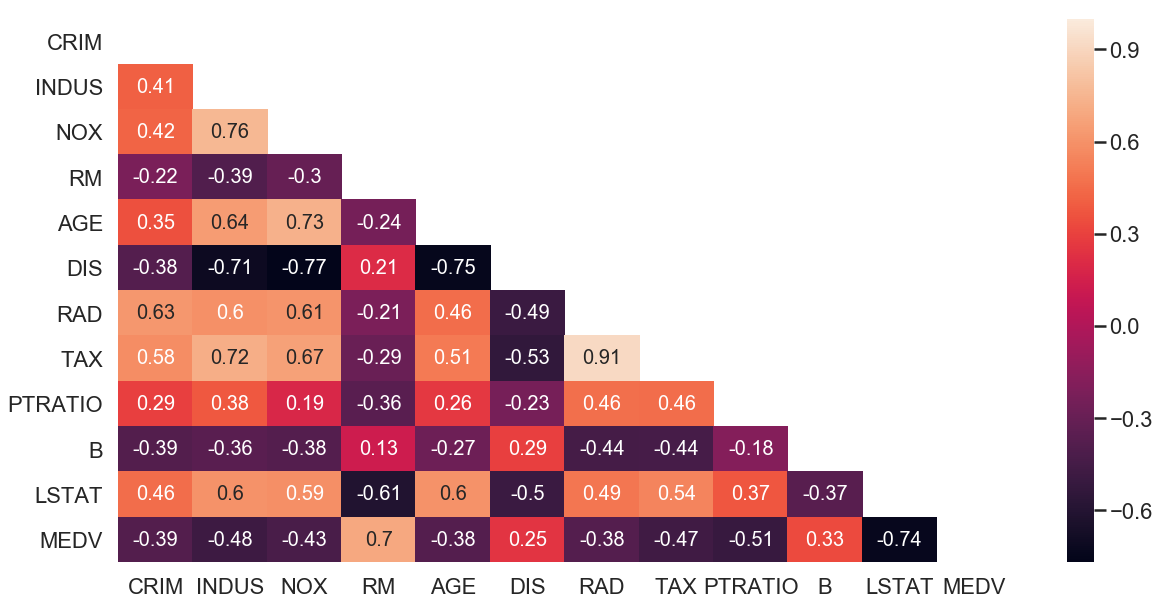

In [20]:
# Adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = df1.corr()

# Create a mask for the upper left triangular portion 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap features
sns.heatmap(corr, mask=mask, annot = True, annot_kws={"size": 20})

<i> <b><u> Observation </u></b>
    
To fit the linear regression model, we are looking for features which have a high correlation with the target varibale (MEDV) 

  * MEDV has a strong positive correlation with RM at 0.7
  * MEDV has a strong negative correlation with LSAT -0.74
  
Multi-co-linearity should be checked prior to selecting the features for linear regression model. These features should not be selected together for training the model as they are strongly correlated to each other

  * The features RAD and TAX have a strong positive correlation of 0.91
  * The features DIS and AGE have a strong negative correlation of -0.75
</i>

# Using statsmodel

In [21]:
# Here we will only select the columns that we want to use i.e. not the ones identified as being multi-co-linear
x = df1[["CRIM", "INDUS", "NOX", "RM", "PTRATIO", "B", "LSTAT"]]
y = df1["MEDV"]

# Adappted from: https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb

# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          3.22e-122
Time:                        10:13:24   Log-Likelihood:                -1544.1
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8620      4.548      2.828      0.0

## Sataistical summary

<p align ="center"><img src="images/boston.jpg" alt="Boston House" width="700" height="500" title="Tip"/></p>

In [22]:
df2= df.copy(deep=True)

df2=df2[df2['MEDV']<50]

In [24]:
# Break the CHAS column into 2 seperate columns based on if they are along the Charles river (1) or other(0)

# Along the Charles river describe function rounded to 2 decimal places
river = df2[df2['CHAS']==1].describe()

# Name the column - Adapted from: https://pythonquestion.com/post/how-can-i-change-name-of-arbitrary-columns-in-pandas-df-using-lambda-function/
river.rename(columns=lambda x:x+'_River', inplace=True) 

# Not along the Charles river describe function rounded to 2 decimal places
other = df2[df2['CHAS']==0].describe()
other.rename(columns=lambda x:x+'_Other',inplace=True) 

# create a new table where you concatenate 
new = pd.concat([river, other], axis=1)

print("\n****************************")
print("     Statistical Summary   ")
print("****************************")
chas = new.loc[:, ['MEDV_River', 'MEDV_Other']]
chas.round(2)


****************************
     Statistical Summary   
****************************


,MEDV_River,MEDV_Other
count,29.00,461.00
mean,23.98,21.49
std,7.02,7.90
min,13.40,5.00
25%,20.00,16.50
50%,22.40,20.60
75%,27.00,24.50
max,46.00,48.80


<i> Looking at both columns from the statistical analysis:
* Max value is \\$50,000 for both as stated earlier this suggests that there was a cap (max value)of \\$50,000 on houses. 
* Mean house price is higher for houses along the Charles river  but there are fewer houses when compared to "Other" houses i.e. houses not along the Charles river </i> 

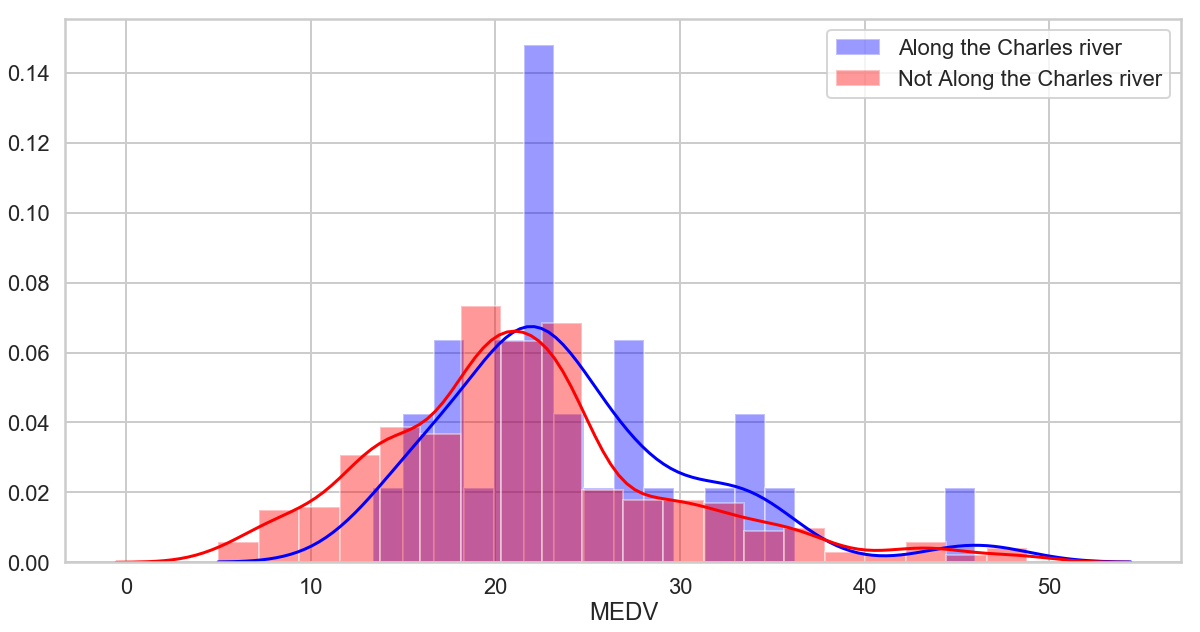

In [28]:
along_river = df2[(df2['CHAS'] == 1)]["MEDV"]
along_other = df2[(df2['CHAS'] == 0)]["MEDV"]

sns.distplot(along_river, bins=20, color="blue", label='Along the Charles river')
sns.distplot(along_other, bins=20, color="red", label='Not Along the Charles river')
plt.legend()
plt.show()

<i>The plot further solidifies the descriptive statistics in that the Mean for hoouses along the river is higher. The minmum house values is lower for houses not along the river</i>

## Analysis of variance (ANOVA) <a href=https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb>[8]</a>

ANOVA compares all means simultaneously and maintains the type I error probability at the designated level. <a href=http://grants.hhp.coe.uh.edu/doconnor/PEP6305/Multiple%20t%20tests.htm>[9]</a>

In [29]:
river = df2[df2["CHAS"] == 1]
river_count = river["CHAS"].count()
print("Number of houses that are along the Charles river        :", river_count)

other = df2[df2["CHAS"] == 0]
other_count = other["CHAS"].count()
print("Number of houses that are not along the Charles river    :", other_count)

print("Total houses both along and not along the Charles river  :", other_count + river_count)

mA = river["MEDV"].mean()
print("Mean MEDV for houses along the Charles River             : ${:,.2f}".format(mA))

mB = other["MEDV"].mean()
print("Mean MEDV for houses not along the Charles River         : ${:,.2f}".format(mB))

Number of houses that are along the Charles river        : 29
Number of houses that are not along the Charles river    : 461
Total houses both along and not along the Charles river  : 490
Mean MEDV for houses along the Charles River             : $23.98
Mean MEDV for houses not along the Charles River         : $21.49


In [30]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb
# Set parameters for two populations.
popA = {'m': mA ,'s': 0.5}
popB = {'m': mB, 's': 0.5}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 29)
sampB = np.random.normal(popB['m'], popB['s'], 29)

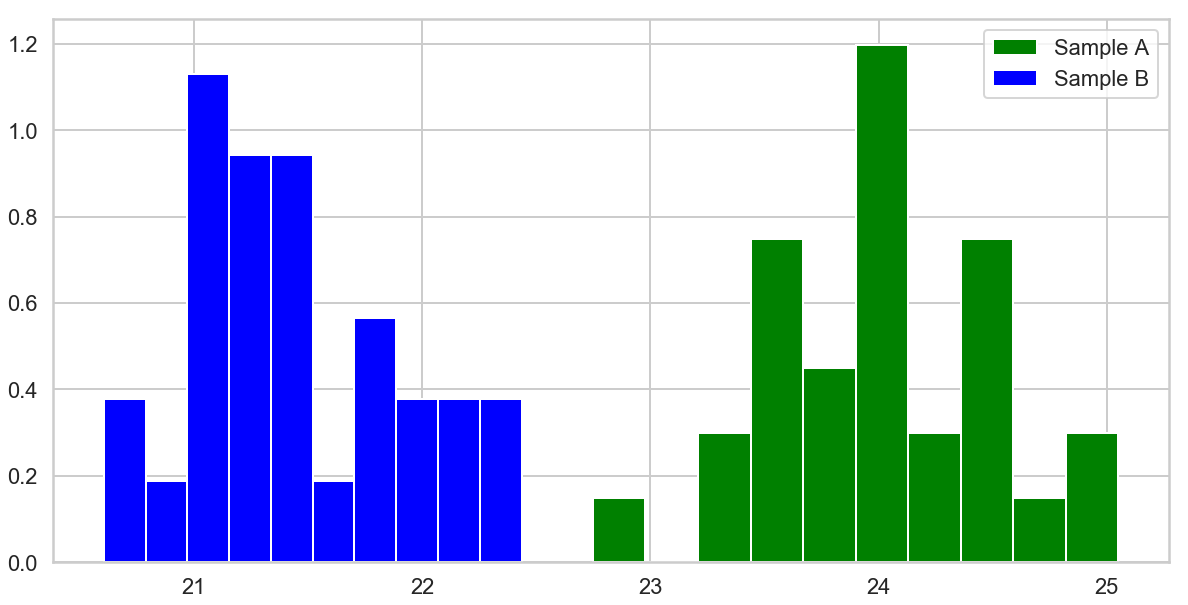

In [31]:
# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', label="Sample A")
plt.hist(sampB, density=True, color='b', label="Sample B")

# Display a legend.
plt.legend()
plt.show()

#### T-test

* t- test finds if there is a significant difference in the mean or median between two independent groups could have happened by chance. <a href=https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/>[6]</a> ttest takes the mean for 2 different groups and determine if there is a significant difference between them. It is important to know that there are 5 assumptions associated with ttest: <a href=https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#t-test-assumptions>[9]</a><i> 
    1. Scale of meaurement that will be applied to the dataset follows a continous scale
    2. Data collected is from a simple random sample (randomly selected from the total portion)
    3. When data is plotted it is of normal distribution, with this assumption the level of significance can be specified as 5%. 
    4. Reasonably large sample size is used
    5. Homogenity of variance which occurs when the standard deviations of the samples are approx equal. </i>

* If the null hypothesis is true the p value is the probability of obtaining a difference at least as large as that observed due to sampling variation. p value greater than 0.05 we fail to reject the null hypothesis.
<a href="http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1427">[7]</a>
   

In [32]:
# Calculate the independent samples t-statistic for the samples.
# We also get the probability of seeing samples at least as different as these given the population means are equal.
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=20.01690425099461, pvalue=3.415840143123082e-27)

# SHAPIRO

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

In [33]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(sampA)
print('\n Shapiro stats - Houses Not Along Charles River: %.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
  
stat, p = shapiro(sampB)
print('\n Shapiro stats - Houses Along Charles River: %.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


 Shapiro stats - Houses Not Along Charles River: 0.986, p=0.963
Sample looks Gaussian (fail to reject H0)

 Shapiro stats - Houses Along Charles River: 0.959, p=0.304
Sample looks Gaussian (fail to reject H0)


# LEVENE

In [34]:
stats.levene(sampA, sampB)

LeveneResult(statistic=0.00045092231118094026, pvalue=0.9831337322120587)

<i> From this we can see that the p value is less than 0.05 which infers we can reject the null hypothesis </i>  

#### Calculating the t-statistic

Note that we are using the calculations for two samples, with equal variances, and possibly different sample sizes.

<p align ="center"><img src="images/formula.svg" alt="Boston House" width="200" height="500" title="Tip"/></p>

In [35]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb

# Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))

# Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.1f}")
print(f"Size of sample B:       {nB:8.1f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

Mean of sample A:        23.9928
Mean of sample B:        21.4585
Size of sample A:           29.0
Size of sample B:           29.0
Variance of sample A:     0.2414
Variance of sample B:     0.2234
Pooled std dev:           0.4821
t-statistic:             20.0169


#### Critical values

For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the (0.5/2.0) = 0.025 level. <a href=https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb>[8]</a>

2.0032407174966975


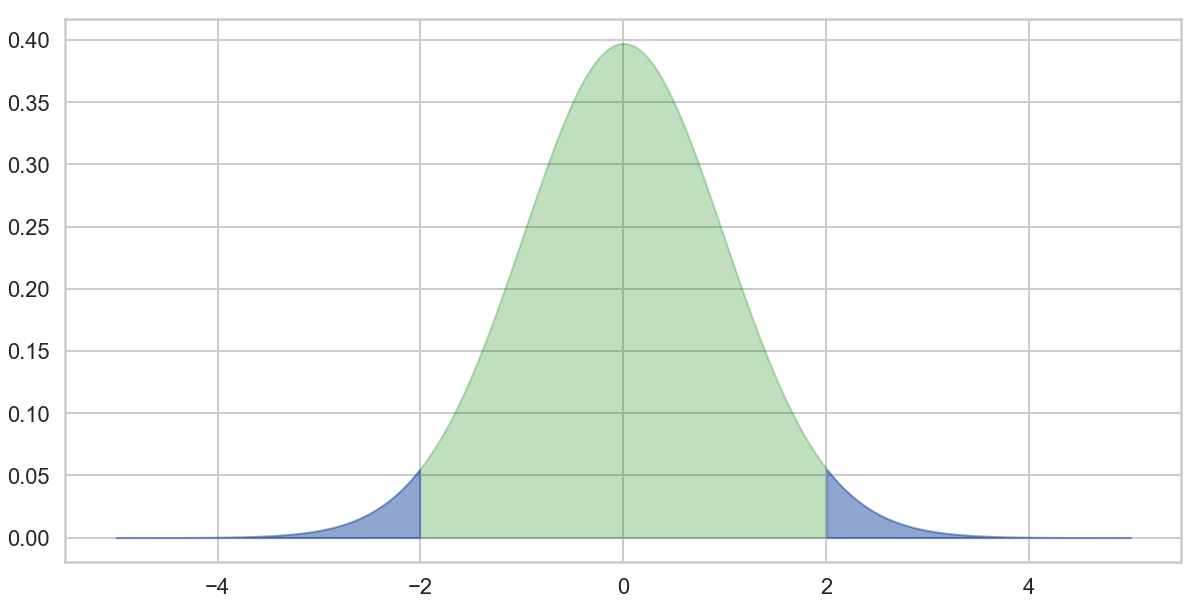

In [36]:
# Adapted from: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

#### Conclusion:

We can reject the null hypothesis as the t value is significantly less than the critical value. At a level of 0.05, there is a one in twenty chance that we incorrectly reject the null hypoothesis. Thus we can say that thie is significant difference in the mean house prices for houses along the Charles River and those that are not along the Charles River.

# Predict

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

In [43]:
df = pd.concat([data, target,], axis = 1)   

df3= df.copy(deep=True)
df3 = df2[df2['MEDV']<50]

In [45]:
# Adapted from: https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false
# Spliting target variable and independent variables
# Adapted from: https://books.google.ie/books?id=7zhDDwAAQBAJ&pg=PT358&lpg=PT358&dq=X+%3D+tips%5B%27total_bill%27%5D.values.reshape(-1,1)+Y+%3D+tips%5B%27tip%27%5D.values.reshape(-1,1)&source=bl&ots=vHyyJ7sVqy&sig=ACfU3U1WQO1y3kwv3o_xi-PomAdcojqz9g&hl=en&sa=X&ved=2ahUKEwjtuMrfmovmAhV1o3EKHaAfBpgQ6AEwAHoECAkQAQ#v=onepage&q=X%20%3D%20tips%5B'total_bill'%5D.values.reshape(-1%2C1)%20Y%20%3D%20tips%5B'tip'%5D.values.reshape(-1%2C1)&f=false

X = df3[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']].values        

y = df3[["MEDV"]].values

# Split the dataset: 70% data to the training set and 30% data to the test set
# random_state sets a seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Size                 :", len(X_train))
print("Training Shape                :",X_train.shape)
print("Test Size                     :", len(X_test))
print("Test Shape                    :",X_test.shape)
print("Total Dataset Size            :",len(X_train) + len(X_test))

Training Size                 : 343
Training Shape                : (343, 13)
Test Size                     : 147
Test Shape                    : (147, 13)
Total Dataset Size            : 490


In [50]:
# Adapted from: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c

# Create linear regression object
lr = LinearRegression()

# Specify the predictor X and the response y 
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

print("Mean Square Error       : {:.2f}".format(mean_squared_error(y_test, predict)))
print("Mean Absolute Error     : {:.2f}".format(metrics.mean_absolute_error(y_test, predict)))
print("Root Mean Square Error  : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predict))))
print("R-Squared               : {:.2f}".format(lr.score(X_train,y_train)))
print("Score                   : {:.2f}".format(model.score(X_test, y_test)))

# Determine the how accurate this algorthm is at predicting values
y_predict = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df

Mean Square Error       : 21.52
Mean Absolute Error     : 3.16
Root Mean Square Error  : 4.64
R-Squared               : 0.74


NameError: name 'model' is not defined

In [ ]:
# https://gogul.dev/software/regression-example-boston-housing-prices


# plot between predictions and Y_test
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

<a name="con"></a>
## Conclusion

<a name="bib"></a>
## Bibliography

### Code Adapted from the following

3  https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
2. https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c
3. https://seaborn.pydata.org/examples/many_pairwise_correlations.html
4. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb

### Code for text
1. https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c
2. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
3. https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb
4. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


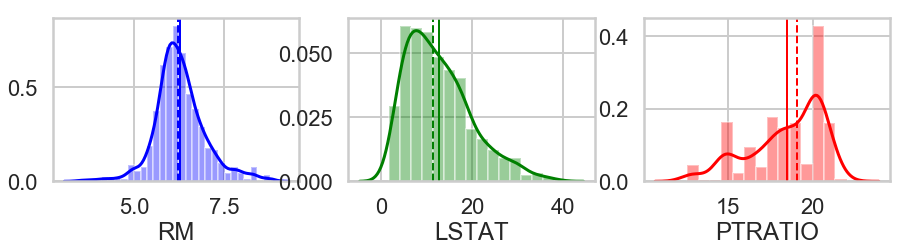

In [15]:
clr = ['blue', 'green', 'red']

fig, axs = plt.subplots(ncols=3,figsize=(15,3))

plt.figure(1)

for i, var in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(131 + i)
    sns.distplot(df[var],  color = clr[i])
    plt.axvline(df[var].mean(), color=clr[i], linestyle='solid', linewidth=2)
    plt.axvline(df[var].median(), color=clr[i], linestyle='dashed', linewidth=2)